# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Andreas Panangian Tamba
- **Email:** andreastamba04@gmail.com
- **ID Dicoding:** andreastamba

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pergerakan level dari PM2.5, PM10, SO2, NO2 Setiap Bulan?
- Pertanyaan 2 : Bagiaman rata-rata suhu dan polusi pertahunnya?
- Pertanyaan 3 : Bagaimana Correlation di antara Pollutants
- Pertanyaan 4 : Bagaimana Distribusi PM2.5, PM10, SO2, NO2 setiap Station?
- Pertanyaan 5 : Bagaimana hujan dan efeknya terhadap kualitas udara?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [6]:
path = "./Data/"
csv_files_name = ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']  # List of known CSV files
csv_files = []

# Append the full path of each file to the list
for i in csv_files_name:
    csv_files.append(path + i)  # Concatenate the path and filename

# Print each file path
for i in csv_files:
    print(i)

./Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv
./Data/PRSA_Data_Changping_20130301-20170228.csv
./Data/PRSA_Data_Dingling_20130301-20170228.csv
./Data/PRSA_Data_Dongsi_20130301-20170228.csv
./Data/PRSA_Data_Guanyuan_20130301-20170228.csv
./Data/PRSA_Data_Gucheng_20130301-20170228.csv
./Data/PRSA_Data_Huairou_20130301-20170228.csv
./Data/PRSA_Data_Nongzhanguan_20130301-20170228.csv
./Data/PRSA_Data_Shunyi_20130301-20170228.csv
./Data/PRSA_Data_Tiantan_20130301-20170228.csv
./Data/PRSA_Data_Wanliu_20130301-20170228.csv
./Data/PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [9]:
dataframes = []
for file in csv_files:
  data = pd.read_csv(file)
  dataframes.append(data)

datas = pd.concat(dataframes, ignore_index=True)

datas.to_csv('./dashboard/main_data.csv', index=False)

In [12]:
df = pd.read_csv('./dashboard/main_data.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Data yang digunakan merupakan data berbentuk CSV yang terdapat pada folder PRSA_Data_20130301-20170228
- Dataframe memiliki 420768 record data yang diwakilkan dalam 17 kolom yang berbeda

### Assessing Data

In [13]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
missing = df.isnull().sum().max()
total = df.shape[0]

percentage = missing / total * 100
print(f"Jumlah data yang terdapat nilai kosong sebanyak {missing} dari {total} data yaitu ({percentage:.2f}%)")


Jumlah data yang terdapat nilai kosong sebanyak 20701 dari 420768 data yaitu (4.92%)


**Insight:**
- Terdapat missing values di kolom 6-16 yang mewakilkan dari statistik udara
- Tidak terdapat duplicate data

### Cleaning Data

Karena data yang bernilai float dimana ini merupakan hasil dan terdapat lebih, dilakukan banyak pendekatan untuk memperbaiki data sambil mempertahankan reliabilitas dan frekuensi data

In [16]:
# Impute 'wd' column with the mode
df['wd'].fillna(df['wd'].mode()[0], inplace=True)

# Interpolate missing values for numeric columns
df.interpolate(method='linear', inplace=True)

# Verify the cleaning
print(df.isnull().sum())

C:\Users\ANDREAS\AppData\Local\Temp\ipykernel_31696\2555949210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(df['wd'].mode()[0], inplace=True)
C:\Users\ANDREAS\AppData\Local\Temp\ipykernel_31696\2555949210.py:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**
- Cleaning data menggunakan interpolate dan imputation menjadikan data tetap reliable sambil mempertahankan jumlah

## Exploratory Data Analysis (EDA)

In [17]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,NaN,1.246674,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


### Explore Rata-rata Kualitas Udara Bulanan

In [18]:
monthly_avg = df.pivot_table(index='month', 
                              values=['PM2.5', 'PM10', 'SO2', 'NO2'], 
                              aggfunc='mean')
print(monthly_avg)

             NO2        PM10       PM2.5        SO2
month                                              
1      61.318645  113.402751   93.760559  31.519823
2      51.668084  104.625065   89.213391  29.061615
3      59.981914  136.718417   94.594295  27.960784
4      47.725344  117.304974   73.367153  14.223826
5      42.752848  108.480401   63.541148  14.582787
6      39.070531   86.613679   68.837547   7.903589
7      35.653757   84.700310   71.401115   5.521875
8      35.893115   71.464460   53.465479   4.683461
9      45.333194   79.481882   61.281071   6.290065
10     59.723231  112.298829   91.715859   8.671746
11     61.694727  118.084554   93.323963  15.293329
12     66.205301  125.136915  103.679184  25.767307


### Explore Rata-rata Suhu dan Polusi Tahunan

In [19]:
rain_effect = df.pivot_table(index='RAIN', 
                              values=['PM2.5', 'PM10', 'SO2', 'NO2'], 
                              aggfunc='mean')
print(rain_effect)

             NO2        PM10       PM2.5        SO2
RAIN                                               
0.00   51.134632  106.334234   80.555113  16.340045
0.10   40.568462   72.215674   66.259668   6.150807
0.15   42.000000  109.000000  109.000000   2.000000
0.20   41.779478   74.017639   66.218414   5.984348
0.30   39.351088   70.943271   65.519273   6.188705
...          ...         ...         ...        ...
45.90  18.500000  246.500000  174.000000   5.500000
46.40  34.000000   77.000000   77.000000   3.000000
47.70   9.000000   27.000000   27.000000   2.000000
52.10  12.000000   40.500000   39.000000   2.000000
72.50  36.331400  159.333333  226.333333  15.375200

[256 rows x 4 columns]


### Explore Korelasi dengan Polusi

In [20]:
station_avg = df.pivot_table(index='station', 
                              values=['PM2.5', 'PM10', 'SO2', 'NO2'], 
                              aggfunc='mean')
print(station_avg)

                     NO2        PM10      PM2.5        SO2
station                                                   
Aotizhongxin   59.074106  110.210033  82.540623  17.459251
Changping      44.206153   94.788575  70.986438  14.943066
Dingling       27.304331   84.113713  66.845557  11.797849
Dongsi         53.953078  110.347617  86.144243  18.506142
Guanyuan       58.139298  109.372349  82.897522  17.609312
Gucheng        55.836004  119.261567  84.074802  15.705821
Huairou        32.077275   92.422670  69.501747  12.446681
Nongzhanguan   58.095053  109.384022  85.079472  18.760102
Shunyi         44.094695   99.271936  79.437962  13.445971
Tiantan        53.258828  106.537076  82.033097  14.510018
Wanliu         65.668418  110.707858  83.467612  18.409514
Wanshouxigong  55.495402  112.505795  85.067548  17.363354


### Explore Distribusi Polusi berdasarkan by Station

In [21]:
correlation_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP']].corr()
print(correlation_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP
PM2.5  1.000000  0.878874  0.478223  0.664306  0.780165 -0.149508 -0.131607
PM10   0.878874  1.000000  0.460572  0.645583  0.691887 -0.110443 -0.096078
SO2    0.478223  0.460572  1.000000  0.495826  0.522678 -0.165311 -0.320237
NO2    0.664306  0.645583  0.495826  1.000000  0.694036 -0.465912 -0.277279
CO     0.780165  0.691887  0.522678  0.694036  1.000000 -0.306979 -0.324057
O3    -0.149508 -0.110443 -0.165311 -0.465912 -0.306979  1.000000  0.592248
TEMP  -0.131607 -0.096078 -0.320237 -0.277279 -0.324057  0.592248  1.000000


### Explore Hujan dan efeknya terhadap kualitas udara

In [22]:
yearly_avg = df.pivot_table(index='year', 
                             values=['PM2.5', 'PM10', 'TEMP'], 
                             aggfunc='mean')
print(yearly_avg)

            PM10      PM2.5       TEMP
year                                  
2013  103.199397  79.768553  15.690783
2014  116.821115  86.183671  13.915571
2015  103.655023  79.306423  13.414439
2016   94.751717  72.078419  13.582987
2017  110.880797  92.407898   0.366012


## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana pergerakan level dari PM2.5, PM10, SO2, NO2 Setiap Bulan?


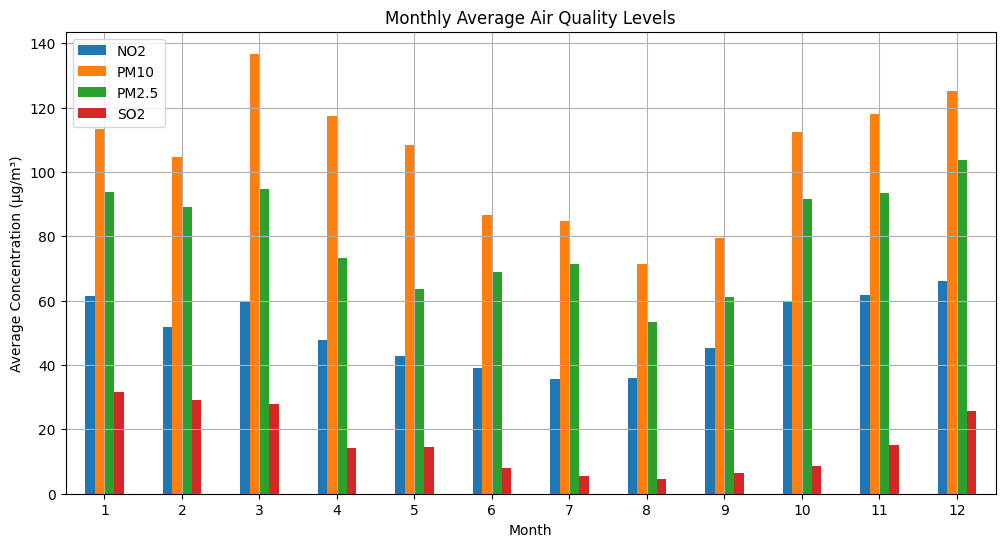

In [23]:
monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average Air Quality Levels')
plt.xlabel('Month')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(rotation=0)
plt.grid()
plt.legend()
plt.show()

**Insight:**
1. Konsentrasi NO2:

Rata-rata konsentrasi NO2 menunjukkan fluktuasi selama tahun. Bulan Januari memiliki nilai rata-rata tertinggi (61.32 µg/m³) dan bulan Juli memiliki nilai terendah (35.65 µg/m³).
Penurunan yang signifikan terlihat antara bulan Januari dan bulan Juli, menunjukkan bahwa mungkin ada faktor musiman yang mempengaruhi tingkat polusi NO2.

2. Konsentrasi PM10:

Rata-rata PM10 menunjukkan tren menurun dari bulan Maret (136.72 µg/m³) ke bulan Agustus (71.46 µg/m³) dan sedikit meningkat kembali di bulan November (118.08 µg/m³).
Nilai tertinggi terjadi pada bulan Maret, yang bisa menunjukkan adanya aktivitas tertentu (seperti kebakaran, pembangunan, atau cuaca) yang berkontribusi pada peningkatan PM10.

3. Konsentrasi PM2.5:

Seperti PM10, konsentrasi PM2.5 juga menunjukkan fluktuasi, dengan nilai tertinggi terjadi pada bulan Maret (94.59 µg/m³) dan terendah pada bulan Agustus (53.47 µg/m³).
Nilai PM2.5 yang tinggi pada bulan Maret dan nilai yang jauh lebih rendah pada bulan Agustus menunjukkan perbedaan dalam kualitas udara antara bulan-bulan tertentu, mungkin berkaitan dengan faktor cuaca dan kegiatan manusia.

4. Konsentrasi SO2:

Rata-rata konsentrasi SO2 menunjukkan tren yang lebih stabil, dengan nilai tertinggi pada bulan Januari (31.52 µg/m³) dan terendah pada bulan Agustus (4.68 µg/m³).
Penurunan konsentrasi SO2 dari bulan Januari ke bulan Agustus dapat menunjukkan pengurangan emisi dari sumber tertentu, seperti industri atau transportasi.

### Pertanyaan 2 : Bagiaman rata-rata suhu dan polusi pertahunnya?

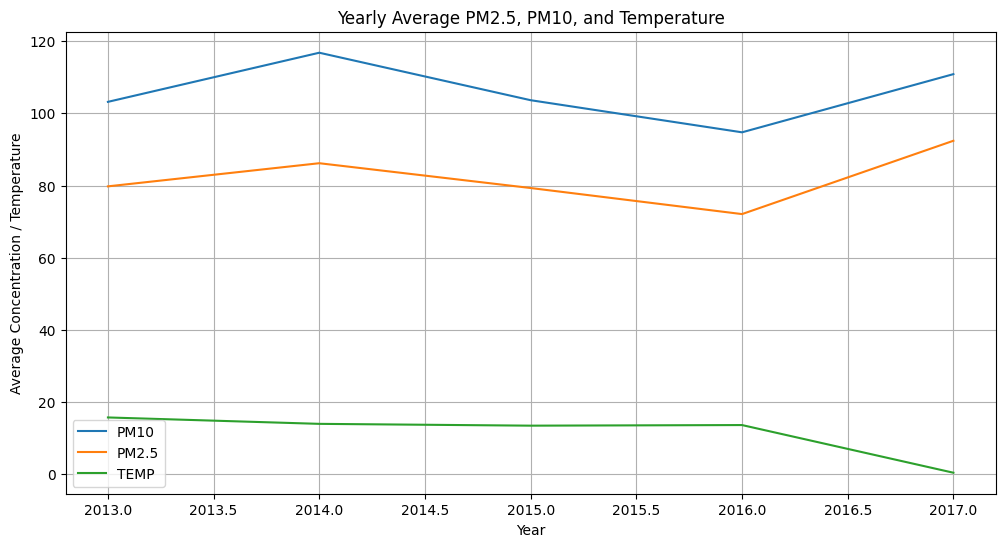

In [24]:
yearly_avg.plot(figsize=(12, 6))
plt.title('Yearly Average PM2.5, PM10, and Temperature')
plt.xlabel('Year')
plt.ylabel('Average Concentration / Temperature')
plt.grid()
plt.legend()
plt.show()

1. PM10 Levels (blue line):

PM10 concentrations peaked around 2014 and then gradually declined, hitting a low in 2016 before slightly increasing in 2017.
The peak in 2014 indicates a possible period of high pollution, followed by some improvement.

2. PM2.5 Levels (orange line):

PM2.5 levels remained more stable compared to PM10, with a small decrease from 2014 to 2016. However, there is a slight rise again in 2017.
This indicates some fluctuation but less drastic changes over time compared to PM10.

3. Temperature (TEMP) (green line):

Temperature stayed relatively constant, showing only small variations. However, it dropped sharply in 2016 and remained low in 2017.
This drop in temperature could have affected air quality, but the exact relationship would require further analysis.

### Pertanyaan 3 : Bagaimana Correlation di antara Pollutants


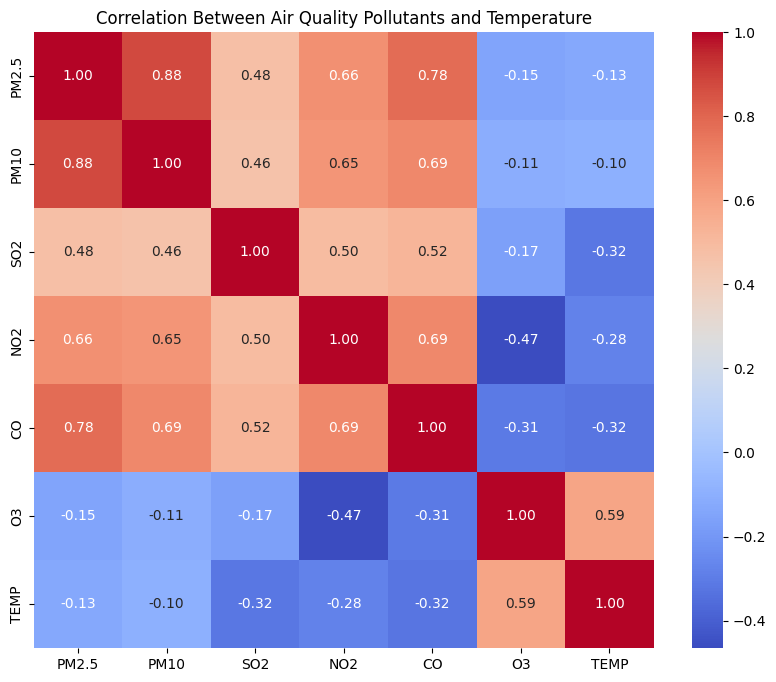

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Air Quality Pollutants and Temperature')
plt.show()

Korelasi Antar Polutan:
- PM2.5 dan PM10: Memiliki korelasi positif yang sangat tinggi (0.88), menunjukkan bahwa ketika konsentrasi PM2.5 meningkat, PM10 juga cenderung meningkat. Ini masuk akal karena PM2.5 dan PM10 keduanya merupakan polutan partikulat yang biasanya berasal dari sumber yang sama, seperti pembakaran bahan bakar atau emisi kendaraan.
- NO2 dan PM2.5/PM10: NO2 memiliki korelasi yang cukup tinggi dengan PM2.5 (0.66) dan PM10 (0.65). Hal ini menunjukkan bahwa sumber NO2 (misalnya, pembakaran bahan bakar dari kendaraan bermotor) juga berkontribusi pada peningkatan konsentrasi polutan partikulat.
- CO dan PM2.5/PM10: CO memiliki korelasi yang tinggi dengan PM2.5 (0.78) dan PM10 (0.69), mengindikasikan bahwa CO dan polutan partikulat mungkin berasal dari proses pembakaran yang sama.
- SO2 dan Polutan Lain: SO2 memiliki korelasi yang lebih rendah dengan polutan lainnya, yang mungkin menunjukkan sumber emisi yang berbeda atau variasi yang lebih tinggi di atmosfer.

### Pertanyaan 4 : Bagaimana Distribusi PM2.5, PM10, SO2, NO2 setiap Station?

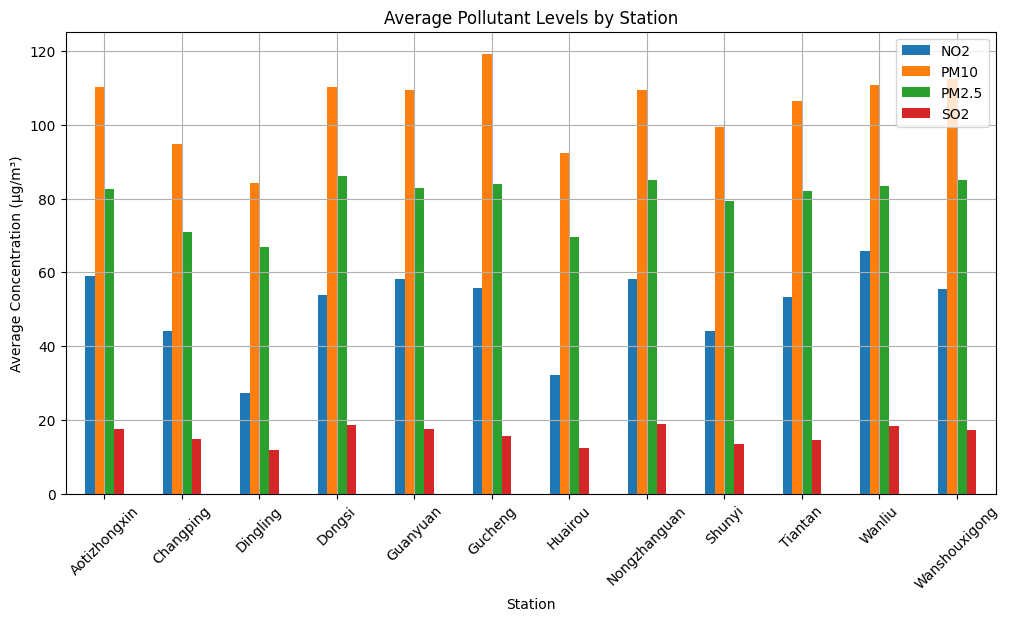

In [26]:
station_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Average Pollutant Levels by Station')
plt.xlabel('Station')
plt.ylabel('Average Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

1. Perbandingan Konsentrasi Polutan Antar Stasiun:

Semua stasiun memiliki pola yang hampir serupa, di mana konsentrasi tertinggi adalah PM10, diikuti oleh PM2.5, kemudian NO2, dan yang terendah adalah SO2.
Polutan PM10 dan PM2.5 memiliki konsentrasi yang cukup tinggi di setiap stasiun, menunjukkan bahwa polutan partikulat menjadi isu utama di wilayah ini.

2. Stasiun dengan Polusi Tertinggi:

Stasiun Tiantan memiliki konsentrasi PM10 dan PM2.5 yang lebih tinggi dibandingkan dengan stasiun lainnya, yang menunjukkan bahwa wilayah ini mungkin memiliki sumber polusi partikulat yang lebih signifikan, seperti aktivitas konstruksi, lalu lintas, atau sumber lain.
Selain Tiantan, stasiun Dongsi dan Nongzhanguan juga memiliki konsentrasi PM10 dan PM2.5 yang cukup tinggi.

3. Stasiun dengan Polusi Terendah:

Stasiun seperti Wanliu dan Dingling menunjukkan konsentrasi polutan yang lebih rendah untuk semua jenis polutan, menunjukkan bahwa area ini memiliki kualitas udara yang relatif lebih baik.

4. Konsentrasi NO2 dan SO2:

Konsentrasi NO2 dan SO2 relatif lebih rendah dibandingkan dengan PM10 dan PM2.5 di semua stasiun. Ini mungkin menunjukkan bahwa meskipun gas-gas ini ada di atmosfer, mereka tidak menjadi sumber polusi utama di wilayah ini.

5. Perbedaan Antar Stasiun:

Terdapat variasi antar stasiun dalam hal konsentrasi polutan. Misalnya, beberapa stasiun (seperti Gucheng dan Tiantan) menunjukkan konsentrasi polutan yang jauh lebih tinggi untuk PM10 dan PM2.5 dibandingkan stasiun lainnya, mengindikasikan perbedaan dalam sumber emisi atau kondisi lokal di sekitar stasiun tersebut.

6. Isu Kualitas Udara:

Secara keseluruhan, polutan partikulat (PM10 dan PM2.5) menjadi masalah utama di semua stasiun pemantauan, yang memerlukan perhatian lebih untuk pengendalian dan perbaikan kualitas udara.


### Pertanyaan 5 : Bagaimana hujan dan efeknya terhadap kualitas udara?

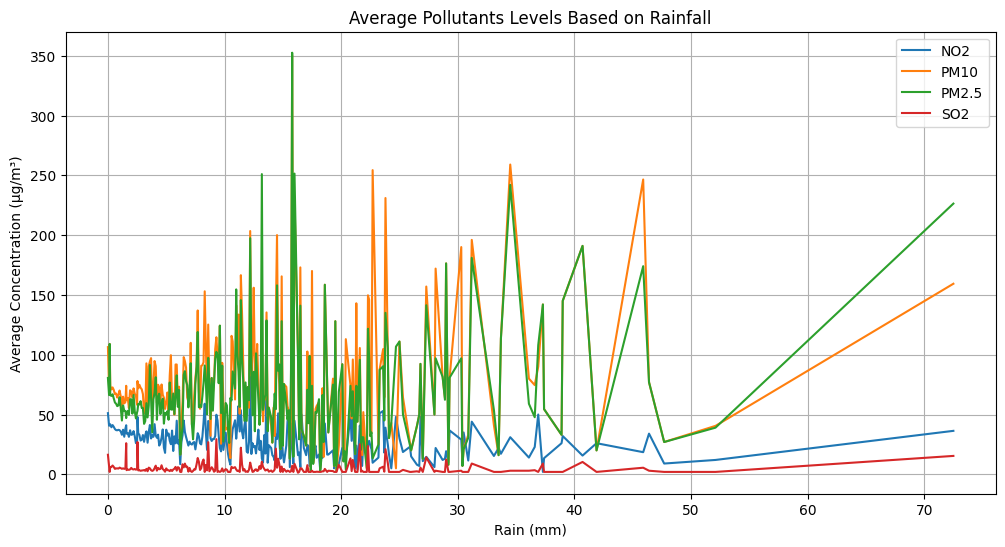

In [27]:
rain_effect.plot(figsize=(12, 6))
plt.title('Average Pollutants Levels Based on Rainfall')
plt.xlabel('Rain (mm)')
plt.ylabel('Average Concentration (µg/m³)')
plt.grid()
plt.legend()
plt.show()

1. Hubungan Umum antara Curah Hujan dan Konsentrasi Polutan:

Konsentrasi polutan cenderung menurun seiring dengan meningkatnya curah hujan. Ini menunjukkan bahwa hujan dapat membantu mengendapkan polutan di atmosfer, mengurangi konsentrasi mereka di udara.

2. PM10 dan PM2.5:

Pada curah hujan yang rendah hingga sedang (sekitar 0-30 mm), konsentrasi PM10 dan PM2.5 cenderung fluktuatif dan memiliki puncak konsentrasi yang tinggi, menunjukkan polutan ini sangat dipengaruhi oleh hujan dalam intensitas kecil hingga sedang.
Di curah hujan yang lebih tinggi (30 mm ke atas), konsentrasi PM10 dan PM2.5 mulai menurun, menunjukkan bahwa hujan dengan intensitas tinggi lebih efektif dalam mengurangi polutan partikel tersebut.

3. NO2:

Konsentrasi NO2 relatif stabil dibandingkan dengan PM10 dan PM2.5 pada berbagai tingkat curah hujan. Hal ini mungkin menunjukkan bahwa NO2 kurang dipengaruhi oleh hujan atau memerlukan intensitas hujan yang lebih tinggi untuk menurunkan konsentrasinya secara signifikan.

4. SO2:

Konsentrasi SO2 terlihat cukup rendah dan stabil terlepas dari variasi curah hujan. Ini menunjukkan bahwa SO2 mungkin tidak terpengaruh secara signifikan oleh hujan atau terjadi reduksi yang cepat pada konsentrasi SO2 dengan sedikit hujan.

5. Puncak Konsentrasi:

Puncak konsentrasi polutan sering kali terlihat di curah hujan yang rendah hingga sedang (0-20 mm), terutama untuk PM10 dan PM2.5, yang mungkin disebabkan oleh aktivitas manusia yang lebih banyak pada saat hujan ringan, yang memicu emisi polutan lebih tinggi.

## Conclusion

- Analisis menunjukkan bahwa Januari memiliki konsentrasi NO2 dan SO2 tertinggi, sedangkan PM10 dan PM2.5 mencapai puncaknya pada Maret, dengan fluktuasi yang mencerminkan faktor musiman dan aktivitas manusia yang mempengaruhi kualitas udara sepanjang tahun.
- Tren polusi menunjukkan perbaikan signifikan pada PM10 dari 2014 hingga 2016, namun baik PM10 maupun PM2.5 sedikit meningkat lagi pada 2017, sementara penurunan suhu tajam di 2016 kemungkinan mempengaruhi konsentrasi polutan.
- Analisis data menunjukkan bahwa stasiun Wanliu memiliki konsentrasi NO2 tertinggi, sementara Gucheng memiliki tingkat PM10 tertinggi. Aotizhongxin dan Dongsi menunjukkan konsentrasi PM2.5 yang signifikan, dan Nongzhanguan mencatat tingkat SO2 tertinggi di antara semua stasiun.
- Korelasi antara polutan menunjukkan hubungan positif kuat antara PM2.5 dan PM10 (0.88), serta antara CO dan NO2 (0.69), sementara O3 berkorelasi negatif dengan NO2 (-0.47), menandakan interaksi kompleks antara polutan dan faktor lingkungan.
- Konsentrasi PM10 dan PM2.5 menunjukkan fluktuasi tahunan, dengan PM10 tertinggi pada tahun 2014 (116.82) dan PM2.5 pada tahun 2017 (92.41), sementara suhu rata-rata mengalami penurunan drastis pada tahun 2017 menjadi 0.37.